<a href="https://colab.research.google.com/github/HermanMoreno98/Machine_Learning/blob/main/Estadistica_para_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic - Machine Learning from Disaster

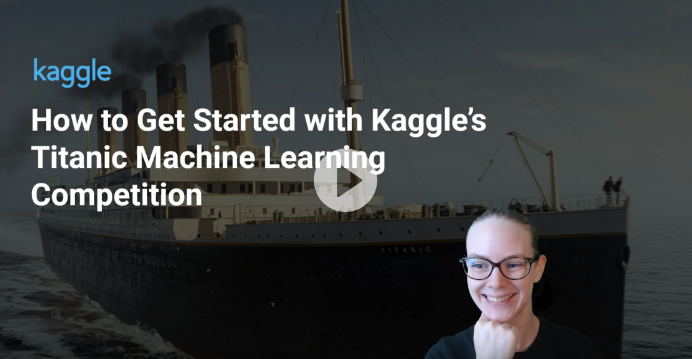

**Data Description**

El dataframe tiene 891 filas y 12 columnas

**Data Dictionary**

|Variable|Description|Key|
|--------|-----------|---|
|survival|Survival|0=No, 1=Yes|
|pclass|Ticket class|1=1st(Upper),2=2nd(Middle),3=3rd(Lower)|
|sex|Sex||
|Age|Age in years||
|sibsp|# of siblings (brother,sister) / spouse (husband,wife)||
|parch|# of parents (mother,father)/children (daughter, son) aboard the Titanic||
|ticket|Ticket number||
|fare|Passenger fare||
|cabin|Cabin number||
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

**[Ir a la página de Kaggle](https://www.kaggle.com/competitions/titanic/data)**

# Importando el dataset

In [ ]:
#@title Give me a name {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

In [63]:
#Importando librerias
import pandas as pd
import numpy as np
import seaborn as sns

In [64]:
#Montar Drive y leer datos
titanic = pd.read_csv("drive/MyDrive/CURSOS/MACHINE LEARNING/Data/train_titanic.csv",delimiter=",")

In [65]:
#Visualizar la tabla
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
titanic.shape

(891, 12)

In [ ]:
#Tipo de datos
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
#Informacion general de la tabla
#Verificar si los tipos de datos son consistentes con la logica del negocio
#Ejm: El feature "Pclass" segun el dataset es entero, sin embargo, es una variable categórica ordinal !
#Ejm: El feature "Age" debería ser numérica discreta, sin embargo aparece como continua
#Por otro lado, discriminar las variables que no serán informativos en el modelo (Ejm: Name,Ticket,etc.)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Llamando una columna del dataset
titanic.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<Axes: >

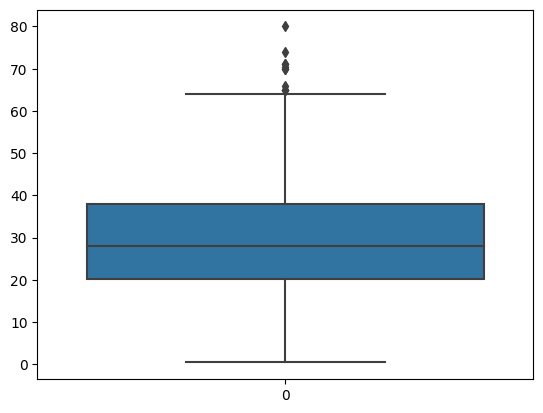

In [ ]:
sns.boxplot(titanic.Age)

# Medidas de tendencia central

## Promedio

In [ ]:
titanic.Age.sum()/titanic.Age.count()

29.69911764705882

In [ ]:
titanic.Age.mean()

29.69911764705882

In [ ]:
#Error de escritura
valores = np.array([28,25,30,24])
print(valores.mean())
valores = np.array([28,25,30,94])
print(valores.mean())

26.75
44.25


## Promedio ponderado

In [ ]:
valores = np.array([12,15.5,18])
ponderacion = np.array([2,1,3])

valores_ponderados = valores*ponderacion
print(valores_ponderados.sum()/ponderacion.sum())
print(valores.mean())

15.583333333333334
15.166666666666666


## Mediana

In [ ]:
titanic.Age.median()

28.0

In [ ]:
# No se ve afectada por los outliers
valores = np.array([28,25,30,94])
print(np.median(valores,axis=0))

29.0


In [ ]:
valores = np.array([-9999999,1,2,4,5,9999999999])
print(np.median(valores,axis=0))

3.0


In [ ]:
#En el caso de la edad, el promedio y la mediana son similares, pero es posible que hayan outliers tirados hacia la derecha (mean > median)
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Percentiles

In [ ]:
arr = np.array([titanic.Age.dropna()])

In [ ]:
# P50 = Q2 = Mediana
np.percentile(arr,50) 

28.0

In [ ]:
# P25 = Q1
np.percentile(arr,25)

20.125

In [ ]:
# P75 = Q3
np.percentile(arr,75)

38.0

# Medidas de variabilidad

## Varianza

In [ ]:
valores = np.array(titanic.Age.dropna())
np.var(valores)

210.72357975366617

## Desviacion estandar

In [ ]:
titanic.Age.std()

14.526497332334042

In [ ]:
notas = [16,16,16]
np.mean(notas)

16.0

In [ ]:
#El promedio oculta la variabilidad de los datos
notas = [14,14,20]
np.mean(notas)

16.0

In [ ]:
edad = [1,30,60]
print(f"El promedio de la edad es {np.mean(edad)}")
print(f"La desviacion estandar de la edad es {np.std(edad)}")
edad = [29,30,32]
print(f"El promedio de la edad es {np.mean(edad)}")
print(f"La desviacion estandar de la edad es {np.std(edad)}")

#Interpretacion:
#Std: promedio del alejamiento de las datos a la media

El promedio de la edad es 30.333333333333332
La desviacion estandar de la edad es 24.087802353519553
El promedio de la edad es 30.333333333333332
La desviacion estandar de la edad es 1.247219128924647


In [ ]:
titanic.describe()
#Edad
min=29.699118-14.526497
max=29.699118+14.526497
print(f"La interpretacion es que el promedio es de 29.699118 y las edades, en promedio, se encuentran entre {min} y {max}")

La interpretacion es que el promedio es de 29.699118 y las edades, en promedio, se encuentran entre 15.172620999999998 y 44.225615


## Rango intercuantilico

In [ ]:
#Resta del quartile 3 y quartile 1
RIC = np.percentile(arr,75) - np.percentile(arr,25)
RIC

17.875

## Coeficiente de variacion

In [67]:
edad = np.array(titanic.Age.dropna())
cv_age = np.std(edad) / np.mean(edad)
cv_age

0.4887795429927496

In [69]:
fare = np.array(titanic.Fare.dropna())
cv_fare = np.std(fare) / np.mean(fare)
cv_fare

1.5422063630081666

In [70]:
#@title Conclusion {display-mode: "form"}

# La variable "Fear" tiene mayor variabilidad, dado que su coef. de variacion es mayor que el de "Age"

# Distribucion de los datos

## Boxplot

<Axes: ylabel='Age'>

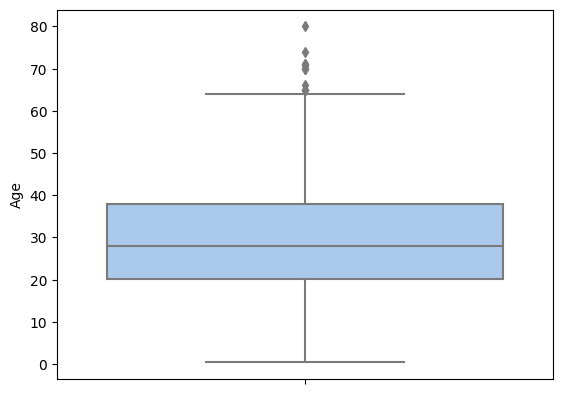

In [71]:
sns.set_palette("pastel")
sns.boxplot(y=titanic.Age)

## Histograma

Para ver la distribucion de los datos

<Axes: >

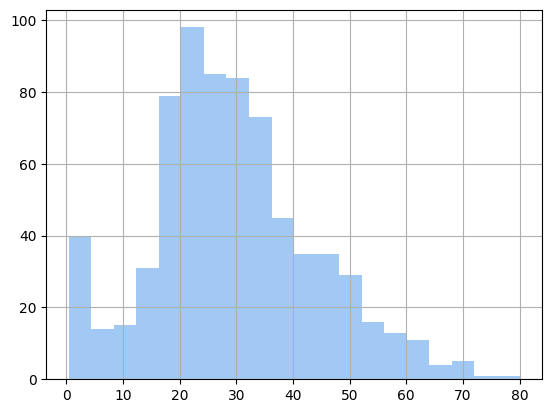

In [77]:
titanic.Age.hist(bins=20)

In [79]:
sns.set_style('darkgrid')
sns.set_palette('winter')

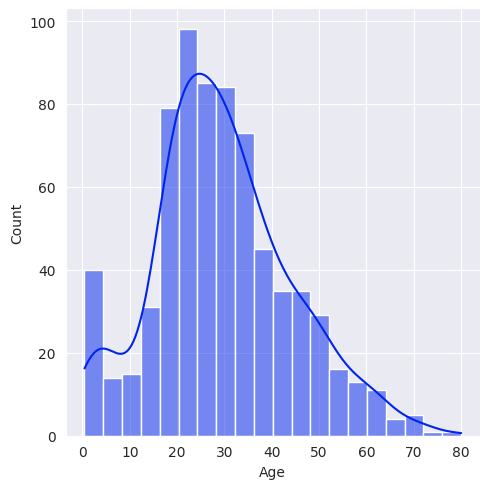

In [80]:
sns.displot(titanic, x='Age', bins=20, kde=True)